# Problem set 2 -  Hoarding and Structural Breaks

### Author: David Henning

### Part I: Hoarding

##### 1) Compute: if the desired number of children is 5, what is the number of births when Infant Mortality Rate (IMR) is 0.5? 0.3? 0.1? 0.05? 0.01? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS, tsa

In [2]:
#Define the parameters
N = 5
l = np.array([0.5, 0.3, 0.1, 0.05, 0.01])
Birth = np.empty_like(l)

#Loop to calculate the number of births given target number of kids and mortality rate
for i in range(len(l)):
    Birth[i] = N / (1-l[i])
    
Birth

array([10.        ,  7.14285714,  5.55555556,  5.26315789,  5.05050505])

##### 2) The total fertility rate of the world went from around 6-7 to around 2. Given your computations what can we say about hoarding as a theory to explain the fertility transition? 

- We cannot say much without knowing the infant mortality rate. 
- Assuming we do know the mortality rate follows the pattern from 1), then it really depends on how many children people wanted.  Assuming they wanted 5, then hoarding cannot explain the fertility transition since preferences also changed from 5 to 2. Assuming they wanted 2, then hoarding would be able to explain at least a significant portion of the fertility transition.

### Part II: Structural Breaks

##### 3) Suppose $y$ increases linearly with time $t$ , with some error, and has no break in trend. What is the estimated break? 

In [3]:
np.random.seed(1234)
a = 1                                  # constant
T = 100
y = np.zeros(T)                        # To store values
t = np.arange(0,100)                   # set t values
ε = np.random.normal(scale=1, size=T)  # Draw random error terms

for i in range(0, T):
    y[i] = t[i] + ε[i]

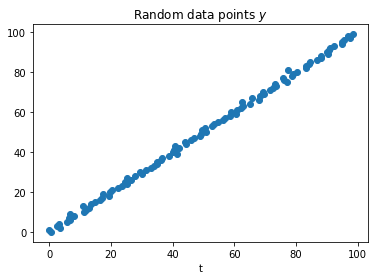

In [4]:
plt.scatter(y, t)
plt.title('Random data points $y$')
plt.xlabel('t')
plt.show()

In [5]:
#Generate a dataframe to work with from now on
df = pd.DataFrame(t,columns=['t'])
df['y'] = pd.DataFrame(y, columns=['y'])
df['y_lag'] = df.y.shift(1)
df['constant'] = 1
df = df[1:]  # Remove first observation

In [6]:
# Set parameters
J = df.shape[1] - 1
k = df.shape[1] - 1
chow = np.zeros(90)

# Run pooled OLS model
model = OLS(df.y, df[['y_lag', 'constant']]).fit()
RSS = model.ssr

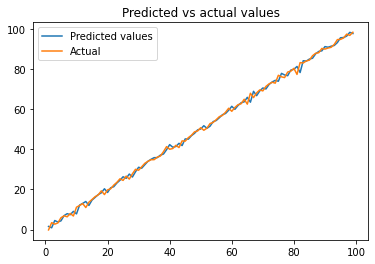

In [13]:
plt.plot(model.fittedvalues, label='Predicted values')
plt.plot(df.y, label='Actual')
plt.title('Predicted vs actual values')
plt.legend()
plt.show()

In [14]:
for i in range(0,90):
    t = i + 5
    
    df1 = df[:t]
    df2 = df[t:]
    
    N1 = df1.shape[0]
    N2 = df2.shape[0]

    model1 = OLS(df1.y, df1[['y_lag', 'constant']]).fit()
    RSS1 = model1.ssr

    model2 = OLS(df2.y, df2[['y_lag', 'constant']]).fit()
    RSS2 = model2.ssr

    chow[i] = ((RSS-(RSS1+RSS2))/J)/((RSS1+RSS2)/(N1+N2-2*k))


In [15]:
df['chow'] = pd.DataFrame(chow, columns=['chow'])
df['chow'] = df.chow.shift(5)

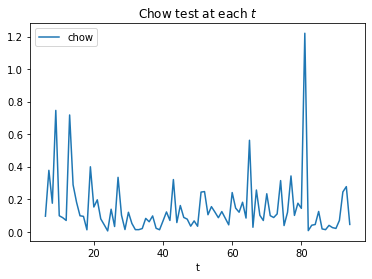

In [27]:
df.plot(x='t', y='chow')
plt.title('Chow test at each $t$')
plt.show()

In [28]:
df.idxmax(axis=0)['chow'] #display the time at which chow is maximized

81

##### 4) Supppose  $y$ is stationary and has a break at $t=30$ . What is the estimated break? What happens if the variance increases over time? 

In [29]:
np.random.seed(1234)
a = 1                                  # constant
y = np.zeros(T)                       # To store values
t = np.arange(0,100)                   # set t values
ε = np.random.normal(scale=0.5, size=T)  # Draw random error terms

In [30]:
#Generate a dataframe to work with from now on
df4 = pd.DataFrame(t,columns=['t'])
df4['constant'] = 1
df4['break'] = (df4.t >= 30).astype(int)
df4['error'] = pd.DataFrame(ε, columns=['error'])
df4['y'] = df4['constant'] + df4['break'] + df4['error']
df4['y_lag'] = df4.y.shift(1)
df4 = df4[1:] # Remove first observation

In [31]:
#### Set parameters
J = df4.shape[1] - 1
k = df4.shape[1] - 1
chow = np.zeros(90)

# Run pooled OLS model
model = OLS(df4.y, df4[['y_lag', 'constant']]).fit()
RSS = model.ssr

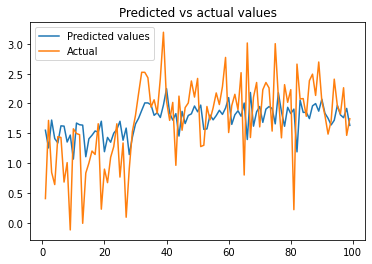

In [32]:
plt.plot(model.fittedvalues, label='Predicted values')
plt.plot(df4.y, label='Actual')
plt.title('Predicted vs actual values')
plt.legend()
plt.show()

In [33]:
for i in range(0,90):
    t = i + 5
    
    df1 = df4[:t]
    df2 = df4[t:]
    
    N1 = df1.shape[0]
    N2 = df2.shape[0]

    model1 = OLS(df1.y, df1[['y_lag', 'constant']]).fit()
    RSS1 = model1.ssr

    model2 = OLS(df2.y, df2[['y_lag', 'constant']]).fit()
    RSS2 = model2.ssr

    chow[i] = ((RSS-(RSS1+RSS2))/J)/((RSS1+RSS2)/(N1+N2-2*k))


In [34]:
df4['chow'] = pd.DataFrame(chow, columns=['chow'])
df4['chow'] = df4.chow.shift(5)

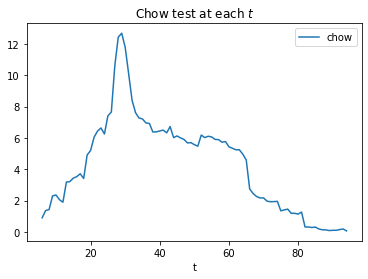

In [35]:
df4.plot(x='t', y='chow')
plt.title('Chow test at each $t$')
plt.show()

In [36]:
df4.idxmax(axis=0)['chow'] #display the time at which chow is maximized

29

##### 5) Supppose  $y$ increases exponentially with time $t$, and has a break at $t=30$ . What is the estimated break? 

In [37]:
np.random.seed(1)
a = 1                                  # constant
y = np.zeros(T)                        # To store values
t = np.arange(0,100)                   # set t values
ε = np.random.normal(scale=0.5, size=T)  # Draw random error terms

In [38]:
#Generate dataframe for the problem
df5 = pd.DataFrame(t,columns=['t'])
df5['break'] = (df5.t >= 30).astype(int) * 10
df5['constant'] = 1
df5['error'] = pd.DataFrame(ε, columns=['error'])
df5['y'] = np.exp(df5['t']) + df5['break'] + df5['error']
df5['y_lag'] = df5.y.shift(1)
df5 = df5[1:] # Remove first observation

In [39]:
#### Set parameters
J = df5.shape[1] - 1
k = df5.shape[1] - 1
chow = np.zeros(90)

# Run pooled OLS model
model = OLS(df5.y, df5[['y_lag', 'constant']]).fit()
RSS = model.ssr

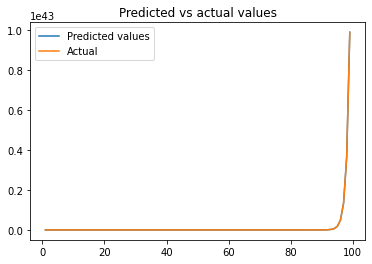

In [40]:
plt.plot(model.fittedvalues, label='Predicted values')
plt.plot(df5.y, label='Actual')
plt.title('Predicted vs actual values')
plt.legend()
plt.show()

In [41]:
for i in range(0,90):
    t = i + 5
    
    df1 = df5[:t]
    df2 = df5[t:]
    
    N1 = df1.shape[0]
    N2 = df2.shape[0]

    model1 = OLS(df1.y, df1[['y_lag', 'constant']]).fit()
    RSS1 = model1.ssr

    model2 = OLS(df2.y, df2[['y_lag', 'constant']]).fit()
    RSS2 = model2.ssr

    chow[i] = ((RSS-(RSS1+RSS2))/J)/((RSS1+RSS2)/(N1+N2-2*k))


In [42]:
df5['chow'] = pd.DataFrame(chow, columns=['chow'])
df5['chow'] = df5.chow.shift(5)

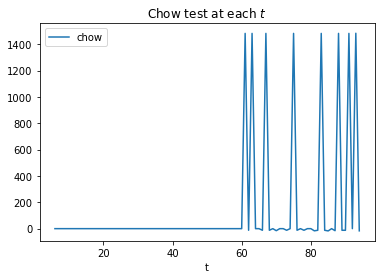

In [44]:
df5.plot(x='t', y='chow')
plt.title('Chow test at each $t$')
plt.show()

In [45]:
df5.idxmax(axis=0)['chow'] #display the time at which chow is maximized

93

##### 6) Supppose  $y$ is stationary and has breaks at $t=30$ and $t=60$ . What is the estimated break? 

In [46]:
np.random.seed(1)
y = np.zeros(T)                        # To store values
t = np.arange(0,100)                   # set t values
ε = np.random.normal(scale=0.5, size=T)  # Draw random error terms

In [47]:
#Generate a dataframe to work with from now on
df6 = pd.DataFrame(t,columns=['t'])
df6['constant'] = 1
df6['break1'] = (df6.t >= 30).astype(int)
df6['break2'] = (df6.t >= 60).astype(int)
df6['error'] = pd.DataFrame(ε, columns=['error'])
df6['y'] = df6['constant'] + df6['break1'] + df6['break2'] + df6['error']
df6['y_lag'] = df6.y.shift(1)
df6 = df6[1:] # Remove first observation

In [48]:
#### Set parameters
J = df6.shape[1] - 1
k = df6.shape[1] - 1
chow = np.zeros(90)

# Run pooled OLS model
model = OLS(df6.y, df6[['y_lag', 'constant']]).fit()
RSS = model.ssr

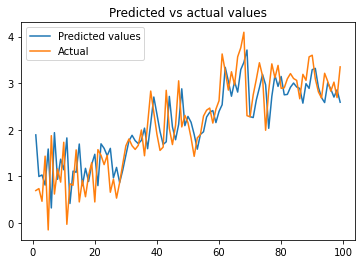

In [50]:
plt.plot(model.fittedvalues, label='Predicted values')
plt.plot(df6.y, label='Actual')
plt.title('Predicted vs actual values')
plt.legend()
plt.show()

In [51]:
for i in range(0,90):
    t = i + 5
    
    df1 = df6[:t]
    df2 = df6[t:]
    
    N1 = df1.shape[0]
    N2 = df2.shape[0]

    model1 = OLS(df1.y, df1[['y_lag', 'constant']]).fit()
    RSS1 = model1.ssr

    model2 = OLS(df2.y, df2[['y_lag', 'constant']]).fit()
    RSS2 = model2.ssr

    chow[i] = ((RSS-(RSS1+RSS2))/J)/((RSS1+RSS2)/(N1+N2-2*k))


In [52]:
df6['chow'] = pd.DataFrame(chow, columns=['chow'])
df6['chow'] = df6.chow.shift(5)

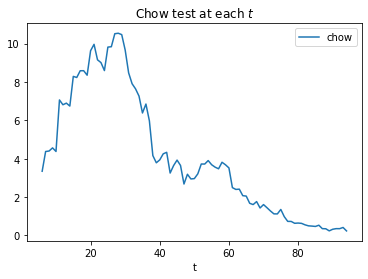

In [54]:
df6.plot(x='t', y='chow')
plt.title('Chow test at each $t$')
plt.show()

In [55]:
df6.idxmax(axis=0)['chow'] #display the time at which chow is maximized

28

##### 7) Summarize your findings

3) When $y$ increases linearly in $t$ and there is no break, the break-point that is chose by an AR(1) model will be chosen towards the end or the beginning of the distribution (i.e. the break-point will be dragged to one of the extremes. This holds even when using different distributions for the error term and different seeds for the data-generating process.

4) When $y$ is stationary and there is a break at $t=30$, the break-point chosen will be right in front of the break (due to the AR(1)) structure. Hence, in this case, the Quandt statistic seems to be performing well, across different seeds and error term distributions.

5) When $y$ increases exponentially in $t$, the increase is so rapid that it "covers" the break. The jump from one $t$ to the next is so big that the break pales in comparison. Hence, the Quandt stat will detect a break towards the higher end of time and not the break we indicated.

6) When $y$ is stationary and there are two breaks, the break-point chosen will be close to one of the two "true" break points. Which one of these is chosen strongly depend on the data-generating process. Different seeds cause the model to have different predictions. The extent of variance is also important. If the variance is really big (think, standard deviation of a 100), then the model has difficulties in finding either break point.

To sum up, the test seems to be performing well when $y$ is stationary and there is a clear break at some point. In other cases, and especially with an exponential distribution it performs po